<font style ="padding:30px;" size = 20><b>Wilson Theta</b></font>

In [294]:
import numpy as np
import matplotlib.pyplot as plt

In [295]:
t = 0.0    #system_time
time = 8    #time of motion to be captured
theta = 1.4       #Wilson-Theta
del_t = 0.005         #time diff between two successive outputs
M = np.array([[4,0, 0],
    [0,4,0],
     [0,0,2]])
K = np.array([[14,-6,0],         #mass and stiffness matrices
    [-6,10,-4],
    [0,-4,4]])
alpha = 0.048               #Rayleigh alpha and beta   standard alpha =  0.048, standard beta = 0.043
beta = 0.043

M_cap = (2.0+theta*del_t/2.0*alpha)*M + (theta*del_t/2.0 * beta)*K     #Mass,stiffness and damping matrices for Wilson-Theta Procedure
C_cap = (6.0/(theta*del_t)+2*alpha)*M + 2*beta*K
K_cap = (6.0/(theta*del_t)**2+2*alpha)*M + (3/(theta*del_t)*beta) * K
K_cap_t = ((6.0/(theta*del_t)**2 + 3/(theta*del_t)*alpha)*M + (1.0 + 3*beta/(theta*del_t))*K)  #Stiffness matrix for calculating displacement at the next time step

In [296]:
def force(t):
    if t<=0.1:
        return np.diff(np.array([0.0,1.0]))[0]/0.1*t
    elif t>0.1 and t<=.2:
        return np.diff(np.array([1.00,1.5]))[0]/0.1*(t-0.1) + 1.0
    elif t>.2 and t<.3:
        return np.diff(np.array([1.5,0.0]))[0]/0.1*(t-0.2) + 1.5
    else:
        return 0.0

<font style= "padding:20px; size:50;"><b>Initial Conditions of the MDOF system</b></font>

<style = "padding:50px;">Initial Conditions</style>

In [297]:
state_system = dict()
t=theta*del_t                           #Boundary Conditions:
state_system = {"D":[], "V":[],"A":[]}
u=np.zeros((3,1))                #initial displacement
state_system["D"].append(u)
u_dotdot = np.zeros((3,1))                 #initial acceleration
state_system["A"].append(u_dotdot)
u_dot = np.zeros((3,1))                 #initial velocity
state_system["V"].append(u_dot)
LS = K_cap_t                #left hand side expression  should remain constant


In [298]:
while t<time:
    RS = M@np.ones((3,1))*(-force(t))+(M_cap @ state_system["A"][-1] + C_cap@state_system["V"][-1] + K_cap@state_system["D"][-1]) #right hand side expression
   
    u_transition=np.linalg.solve(LS,RS)   #ut+0.007
    u_dotdot_transition = 6/(del_t*theta)**2 *(u_transition- state_system["D"][-1]) - 6/(theta*del_t)* state_system["V"][-1] -2*state_system["A"][-1] #udotdot 0.007

    A_new = state_system["A"][-1] + del_t / (theta*del_t)*(u_dotdot_transition-state_system["A"][-1])
    state_system["A"].append(A_new) 
    
    V_new = state_system["V"][-1] + del_t* state_system["A"][-2] + (del_t**2)/(2*theta*del_t)*(u_dotdot_transition - state_system["A"][-2])#append the acceleration at 0.005
    state_system["V"].append(V_new)#append the velocity at 0.005 interval
    D_new = state_system["D"][-1]+del_t*state_system["V"][-2] + (del_t)**3/(6*theta*del_t)*(u_dotdot_transition - state_system["A"][-2]) + (del_t)**2/2 *state_system["A"][-2] 
    state_system["D"].append(D_new)
    t = t+ del_t #increase the time and start the new time calculation



In [299]:
acceleration = np.array(state_system["A"])
acceleration = np.reshape(acceleration,(int(len(state_system["A"])),3))
velocity  = np.reshape(acceleration,(int(len(state_system["A"])),3))
displacement = np.reshape(acceleration,(int(len(state_system["A"])),3))

Plot the velocity, displacement and acceleration!

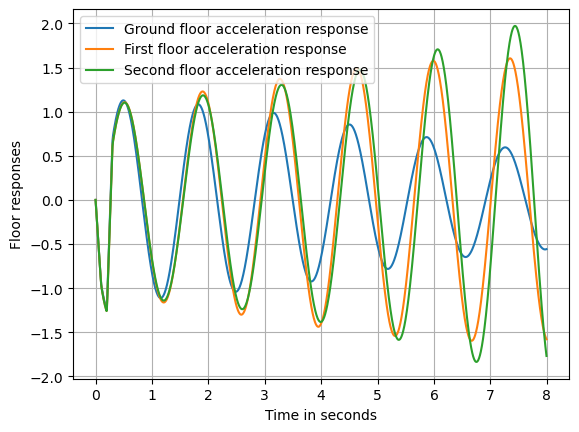

In [300]:
plt.plot(np.arange(0,time,del_t), acceleration[:,0], label = "Ground floor acceleration response")
plt.plot(np.arange(0,time,del_t), acceleration[:,1], label = "First floor acceleration response")
plt.plot(np.arange(0,time,del_t), acceleration[:,2], label = "Second floor acceleration response")
plt.xlabel("Time in seconds")
plt.ylabel("Floor responses")
plt.legend()
plt.grid()

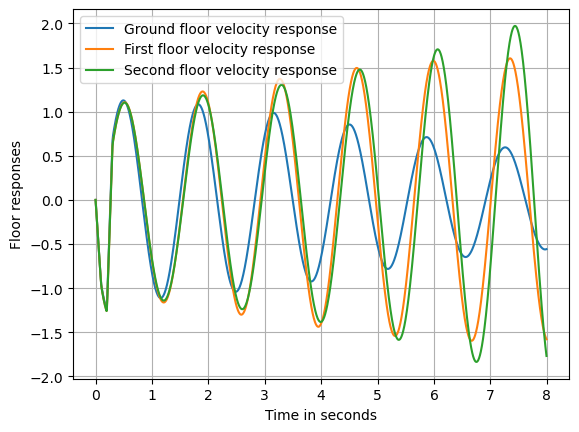

In [301]:
plt.plot(np.arange(0,time,del_t), velocity[:,0], label = "Ground floor velocity response")
plt.plot(np.arange(0,time,del_t), velocity[:,1], label = "First floor velocity response")
plt.plot(np.arange(0,time,del_t), velocity[:,2], label = "Second floor velocity response")
plt.xlabel("Time in seconds")
plt.ylabel("Floor responses")
plt.legend()
plt.grid()

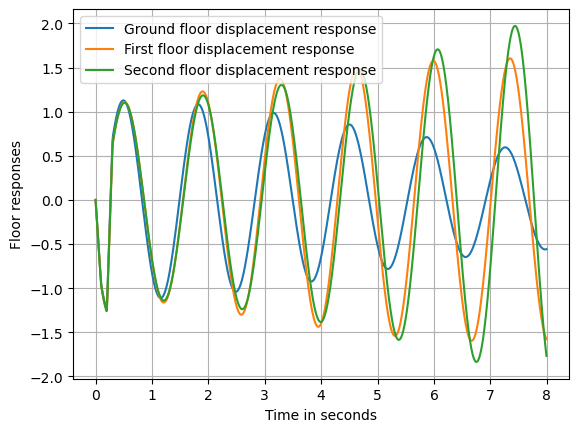

In [302]:
plt.plot(np.arange(0,time,del_t), displacement[:,0], label = "Ground floor displacement response")
plt.plot(np.arange(0,time,del_t), displacement[:,1], label = "First floor displacement response")
plt.plot(np.arange(0,time,del_t), displacement[:,2], label = "Second floor displacement response")
plt.xlabel("Time in seconds")
plt.ylabel("Floor responses")
plt.legend()
plt.grid()

Using Subplots

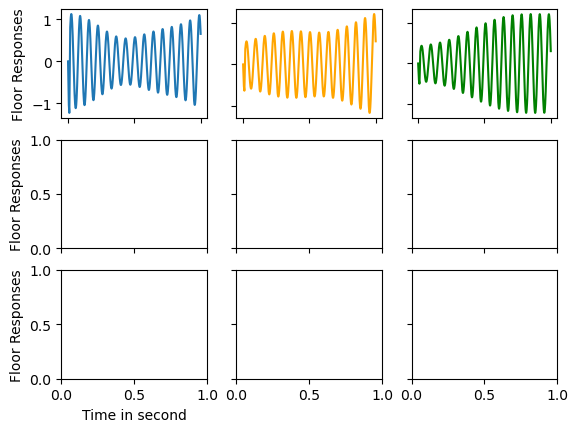

In [285]:
fig, axes = plt.subplots(3,3)

axes[0,0].plot(np.arange(0,time,del_t), acceleration[:,0], label = "Ground floor response")
axes[0,1].plot(np.arange(0,time,del_t), acceleration[:,1], label = "First floor response", color = "orange")
axes[0,2].plot(np.arange(0,time,del_t), acceleration[:,2], label = "Second floor response", color = "green")

for i,ax in enumerate(axes.flat):
    ax.set(xlabel = "Time in second",ylabel = "Floor Responses") if i in [0,3,6] else 2/2
for ax in axes.flat:
    ax.label_outer()